# Error Evaluation for Regression Models

Employees' years of experience and salary information are given.

In [1]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# dataset

data = [[5,600],[7,900],[3,550],[3,500],[2,400],[7,950],[3,540],[10,1200],[6,900],[4,550],[8,1100],[1,460],[1,400],
        [9,1000],[1,380]]

data = pd.DataFrame(data, columns=['experience', 'wage'])
data

,experience,wage
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400
5,7,950
6,3,540
7,10,1200
8,6,900
9,4,550


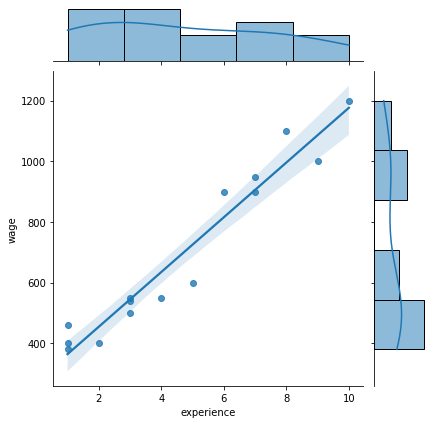

In [3]:
sns.jointplot(x=data['experience'], y=data['wage'], data=data, kind='reg');

## TASK 1 : 

Create the linear regression model equation according to the given bias and weight.

        bias=275, weight=90 (y'=b+wx)

**Answer **

    y = 275 + 90 * experience

## TASK 2 :

Estimate the salary for all years of experience in the table according to the model equation you created.

In [4]:
def make_estimation(dataframe,column_name,bias,weight):
    
    estimated_salaries = []

    for i in dataframe[column_name]:
        estimation = 275 + 90 * i
        estimated_salaries.append(estimation)
        
    return estimated_salaries

In [5]:
estimated_salaries = make_estimation(dataframe = data,column_name = "experience",bias = 275,weight = 90)
data["estimated_salaries"] = estimated_salaries
data

,experience,wage,estimated_salaries
0,5,600,725
1,7,900,905
2,3,550,545
3,3,500,545
4,2,400,455
5,7,950,905
6,3,540,545
7,10,1200,1175
8,6,900,815
9,4,550,635


## TASK 3 :

Calculate the MSE, RMSE, MAE scores to measure the success of the model.

In [6]:
def calculate_error(dataframe,column_name,predict_column_name):
    
    error = []
    squared_error = []
    absolute_error = []

    for i in range(len(dataframe[column_name])):
        err = data[column_name][i] - data[predict_column_name][i]
        error.append(err)
        squared_error.append(err**2)
        absolute_error.append(abs(err))
        
        
    return error, squared_error,absolute_error

In [7]:
def calculate_mean_squared_error(dataframe,column_name):
    
    n = len(dataframe)
    sum_of_errors = 0
    
    for i in range(n):
        sum_of_errors += dataframe[column_name][i]
        mse = sum_of_errors / n
        
    return mse

In [8]:
def calculate_root_mean_squared_error(dataframe,column_name):
    
    n = len(dataframe)
    sum_of_errors = 0
    
    for i in range(n):
        sum_of_errors += dataframe[column_name][i]
        mse = sum_of_errors / n
        rmse = math.sqrt(mse)
        
    return rmse

In [9]:
def calculate_mean_absolute_error(dataframe,column_name):
    
    n = len(dataframe)
    sum_of_errors = 0
    
    for i in range(n):
        sum_of_errors += dataframe[column_name][i]
        mae = sum_of_errors / n
        
    return mae

In [10]:
error, squared_error,absolute_error = calculate_error(data,"wage","estimated_salaries")
data["error"] = error
data["squared_error"] = squared_error
data["absolute_error"] = absolute_error
data

,experience,wage,estimated_salaries,error,squared_error,absolute_error
0,5,600,725,-125,15625,125
1,7,900,905,-5,25,5
2,3,550,545,5,25,5
3,3,500,545,-45,2025,45
4,2,400,455,-55,3025,55
5,7,950,905,45,2025,45
6,3,540,545,-5,25,5
7,10,1200,1175,25,625,25
8,6,900,815,85,7225,85
9,4,550,635,-85,7225,85


In [11]:
mean_square_error = calculate_mean_squared_error(data,"squared_error")
root_mean_square_error = calculate_root_mean_squared_error(data,"squared_error")
mean_absolute_error = calculate_mean_absolute_error(data,"absolute_error")

print("Mean Square Error: ", round(mean_square_error,2))
print("Root Mean Square Error: ", round(root_mean_square_error,2))
print("Mean Absolute Square Error: ", round(mean_absolute_error,2))

Mean Square Error:  4438.33
Root Mean Square Error:  66.62
Mean Absolute Square Error:  54.33


# Prediction with Scikit-Learn

In [17]:
X = data[['experience']]
y = data[['wage']]

linear_regression_model = LinearRegression()
#Fit method is used for fitting your training data into the model
linear_regression_model.fit(X,y)

LinearRegression()

In [18]:
print("Co-efficient of linear regression: ",linear_regression_model.coef_[0][0])
print("Intercept of linear regression model: ",linear_regression_model.intercept_[0])

Co-efficient of linear regression:  90.20942408376962
Intercept of linear regression model:  274.35602094240846


In [20]:
predictions = linear_regression_model.predict(X)
print(linear_regression_model.get_params())
print('Mean Square Error: ', mean_squared_error(y, predictions))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Mean Square Error:  4437.849912739964
